In [1]:
import random
import numpy as np

In [2]:
def rightmost_partition(A,p,r):
    pivot=A[r]
    i=p-1
    for j in range(p,r):
        if(A[j]<=pivot):
            i=i+1
            A[i],A[j]=A[j],A[i]
    i=i+1
    A[i],A[r]=A[r],A[i]
    return i

In [3]:
def rightmost_quicksort(A,p,r):
    if(p<r):
        q=rightmost_partition(A,p,r)
        rightmost_quicksort(A,p,q-1)
        rightmost_quicksort(A,q+1,r)
        return A

In [4]:
lst=list([8,1,6,3,2,4,7,5])
A=np.array(lst)
p=0
r=len(A)-1
rightmost_quicksort(A,p,r)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
def random_partition(A,p,r):
    rand=random.randint(p,r)
    A[r],A[rand]=A[rand],A[r]
    q=rightmost_partition(A,p,r)
    return q

In [6]:
def random_quicksort(A,p,r):
    if(p<r):
        q=random_partition(A,p,r)
        random_quicksort(A,p,q-1)
        random_quicksort(A,q+1,r)
        return A

In [7]:
lst=list([8,1,6,3,2,4,7,5])
A=np.array(lst)
p=0
r=len(A)-1
random_quicksort(A,p,r)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
def midpoint_partition(A,p,r):
    mid=(p+r)//2
    A[r],A[mid]=A[mid],A[r]
    q=rightmost_partition(A,p,r)
    return q

In [9]:
def midpoint_quicksort(A,p,r):
    if(p<r):
        q=midpoint_partition(A,p,r)
        midpoint_quicksort(A,p,q-1)
        midpoint_quicksort(A,q+1,r)
        return A

In [10]:
lst=list([8,1,6,3,2,4,7,5])
A=np.array(lst)
p=0
r=len(A)-1
midpoint_quicksort(A,p,r)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
import timeit
import matplotlib.pyplot as plt

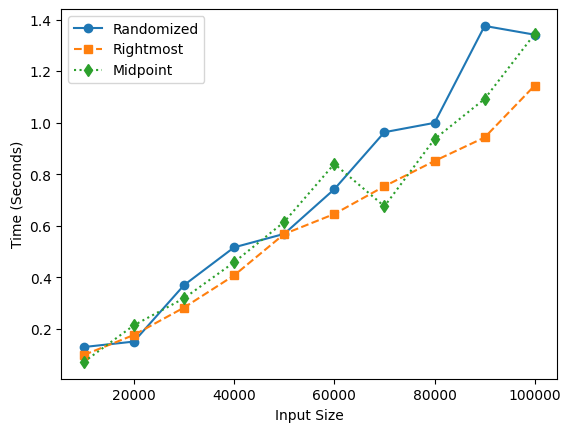

In [21]:
results_randomized = []
results_rightmost = []
results_midpoint = []

for n in range(10000, 100001, 10000):
    lst = [random.randint(1, n) for _ in range(n)]
    A = np.array(lst)
    p = 0
    r = len(A) - 1
    
    time_randomized = timeit.timeit(lambda: random_quicksort(A.copy(), p, r), number=1)
    time_rightmost = timeit.timeit(lambda: rightmost_quicksort(A.copy(), p, r), number=1)
    time_midpoint = timeit.timeit(lambda: midpoint_quicksort(A.copy(), p, r), number=1)
    
    results_randomized.append(time_randomized)
    results_rightmost.append(time_rightmost)
    results_midpoint.append(time_midpoint)

# Plot the results
plt.plot(range(10000, 100001, 10000), results_randomized, 'o-', label="Randomized")
plt.plot(range(10000, 100001, 10000), results_rightmost, 's--', label="Rightmost")
plt.plot(range(10000, 100001, 10000), results_midpoint, 'd:', label="Midpoint")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time (Seconds)")
plt.show()